Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Necessary preprocessing, drop the unNecessary columns

In [6]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.shape

(10000, 11)

# Encoding categorical variables

In [9]:
# Gender: Female -> 0, Male -> 1

le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


### Now for Geography

In [11]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
ohe_geography = OneHotEncoder(drop='first')
geo_encoded = ohe_geography.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe_geography.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [13]:
data = pd.concat([data.drop(columns=['Geography']), geo_encoded_df], axis=1)

In [14]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [15]:
data.shape

(10000, 12)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


## Necessary EDA (basic descriptive statistics)

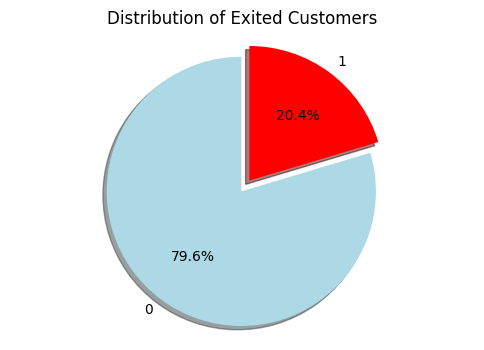

In [17]:
exited_counts = data['Exited'].value_counts()

plt.figure(figsize=(6, 4))  

plt.pie(exited_counts, 
        labels=exited_counts.index, 
        autopct='%1.1f%%',  
        startangle=90,      
        colors=['lightblue', 'red'], 
        explode = (0, 0.1), 
        shadow=True)      

plt.title('Distribution of Exited Customers')
plt.axis('equal')
plt.show()

# Splitting features and target

In [18]:
X = data.drop(columns=['Exited'], axis=1)
y = data[['Exited']]

In [19]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0


In [20]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Split dataset into 70% train and 30% test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.shape

(7000, 11)

In [23]:
X_test.shape

(3000, 11)

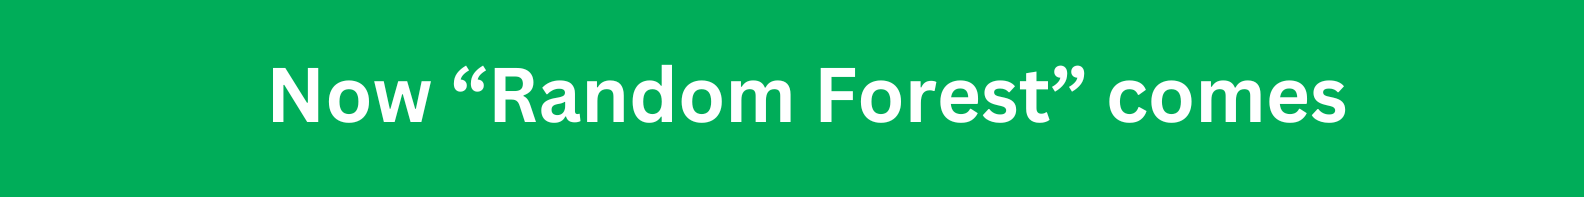

In [24]:
from sklearn.ensemble import RandomForestClassifier

## We can set the tree numbers (here it is 155 (always choose odd))

In [25]:
clf_ran = RandomForestClassifier(n_estimators=155)

Fit the model

In [26]:
clf_ran.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=155)

Let's predict

In [27]:
ran_pred = clf_ran.predict(X_test)
ran_pred

array([0, 0, 0, ..., 0, 0, 0])

We have to see the score

In [33]:
accuracy_score(y_test, ran_pred)

0.8706666666666667

# Let's see confusion matrix

In [34]:
cm_ran = confusion_matrix(y_test, ran_pred)
cm_ran

array([[2331,   85],
       [ 303,  281]])

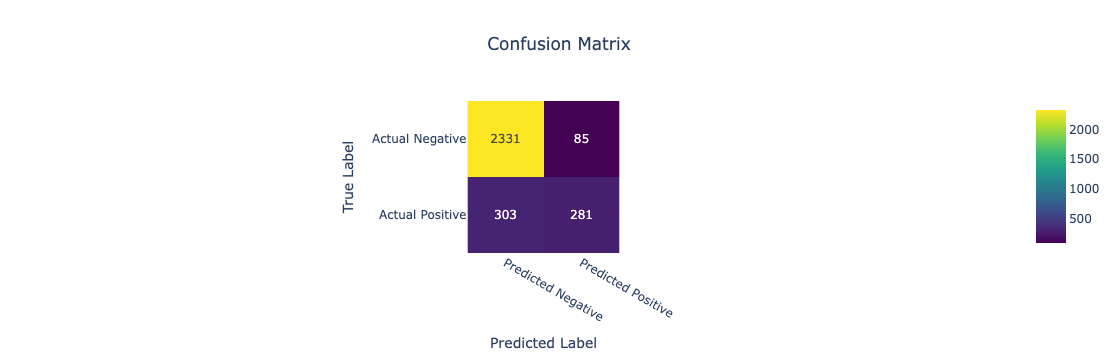

In [37]:
cm_df = pd.DataFrame(cm_ran, index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

fig = px.imshow(cm_df, 
                text_auto=True, 
                color_continuous_scale="Viridis", 
                title="Confusion Matrix")

fig.update_layout(
    title={
        'text': "Confusion Matrix",
        'x': 0.5, 
        'xanchor': 'center' 
    },
    
    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    coloraxis_showscale=True
)

fig.show()